In [1]:
import pandas as pd
import numpy as np

In [2]:
customer_df = pd.read_csv("/Users/vickichen/Desktop/W05Project/data/twm_customer.csv",sep=";")
savings_df = pd.read_csv("/Users/vickichen/Desktop/W05Project/data/twm_savings_acct.csv",sep=';')
credit_df = pd.read_csv("/Users/vickichen/Desktop/W05Project/data/twm_credit_acct.csv",sep=';')
trans_df= pd.read_csv("/Users/vickichen/Desktop/W05Project/data/twm_transactions.csv",sep=';')
accts_df= pd.read_csv("/Users/vickichen/Desktop/W05Project/data/twm_accounts.csv",sep=';')



In [3]:
#check savings_acct dataset
savings_df

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [4]:
#How much do they save?
savings_df['total_saved'] =savings_df['ending_balance']-savings_df['starting_balance']

In [5]:
savings_df['total_saved']

0        9.50
1     -638.84
2        3.78
3        9.07
4      890.33
        ...  
416    351.24
417    174.73
418    211.08
419    -73.71
420     -6.67
Name: total_saved, Length: 421, dtype: float64

In [6]:
savings_df

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_saved
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-73.71


In [7]:
#merge with twn_customer
bank_bhv=customer_df.merge(savings_df[['cust_id','account_active','total_saved']].rename(columns={'account_active':'savings_account'}),
                                 left_on = 'cust_id',
                                 right_on = 'cust_id',
                                 how = 'left')



In [8]:
#to replace NaN with 0 in total_saved column
bank_bhv['total_saved'].fillna(0,inplace=True)

In [9]:
bank_bhv

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,-73.71
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,0.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,0.00


In [10]:
#change savings_account Nan to No_account, Y - activem N-inactive in savings_account column
bank_bhv['savings_account']=bank_bhv['savings_account'].str.strip()\
                                                        .replace({np.NaN:'no_account',
                                                                  'Y':'Active',
                                                                  'N':'Inactive'})


In [11]:
bank_bhv

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,no_account,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,Inactive,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Active,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Active,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Active,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,no_account,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Active,-73.71
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,no_account,0.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,no_account,0.00


In [12]:
#check credit_df dataset
credit_df

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [13]:
#How much do they live in debt?
credit_df['total_debt']=credit_df['ending_balance']-credit_df['starting_balance']
credit_df.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_debt
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,-370.77
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,-6896.57
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,-2302.14
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,1000.00


In [14]:
#merge again with the first merged table from twn_customers & twn_savings_accts
bank_bhv=bank_bhv.merge(credit_df[['cust_id','account_active','total_debt','credit_limit']].rename(columns={'account_active':'credit_account'}),
                                                                                            left_on='cust_id',
                                                                                            right_on='cust_id',
                                                                                            how = 'left')
                        

In [15]:
bank_bhv

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,total_debt,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,no_account,0.00,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,Inactive,-638.84,Y,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Active,9.50,Y,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Active,9.07,N,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Active,3.78,Y,-6896.57,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,no_account,0.00,NaN,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Active,-73.71,Y,1300.00,1300.0
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,no_account,0.00,Y,9200.00,9200.0
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,no_account,0.00,N,2.11,3000.0


In [16]:
#replace credit_limit & total_debt NaN to 0
bank_bhv['credit_limit'].fillna(0, inplace=True)
bank_bhv['total_debt'].fillna(0, inplace=True)
bank_bhv.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,total_debt,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,no_account,0.00,NaN,0.00,0.0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,Inactive,-638.84,Y,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Active,9.50,Y,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Active,9.07,N,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Active,3.78,Y,-6896.57,6700.0


In [17]:
#change savings_account Nan to No_account, Y - activem N-inactive in savings_account column
bank_bhv['credit_account']=bank_bhv['credit_account'].str.strip()\
                                                        .replace({np.NaN:'no_account',
                                                                  'Y':'Active',
                                                                  'N':'Inactive'})

In [18]:
bank_bhv

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,total_debt,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,no_account,0.00,no_account,0.00,0.0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,Inactive,-638.84,Active,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Active,9.50,Active,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Active,9.07,Inactive,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Active,3.78,Active,-6896.57,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,no_account,0.00,no_account,0.00,0.0
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Active,-73.71,Active,1300.00,1300.0
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,no_account,0.00,Active,9200.00,9200.0
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,no_account,0.00,Inactive,2.11,3000.0


In [19]:
#check twm_transactions dataset
trans_df

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [20]:
#check twm_accounts dataset
accts_df

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [21]:
#to insert cust_id to trans_df table to merge on customers
trans_df=trans_df.merge(accts_df[['acct_nbr','cust_id']], 
                                        left_on = 'acct_nbr',
                                        right_on = 'acct_nbr',
                                        how = 'inner')
trans_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id
0,27,13625623,0.00,0.00,0.00,3753.34,21.10.1995,121656,A,IQ,1362562
1,39,13625623,140.63,140.63,0.00,3859.95,27.12.1995,170033,B,DP,1362562
2,2,13625623,0.49,0.00,0.49,392.94,28.2.1995,235959,,IN,1362562
3,14,13625623,-120.00,-120.00,0.00,2253.68,6.8.1995,204727,A,WD,1362562
4,26,13625623,-140.00,-140.00,0.00,3753.34,21.10.1995,121543,A,WD,1362562


In [22]:
# compute summary stats from tws_trnsactions table


trans_df_grouped=trans_df.groupby('cust_id').agg(avg_trans_amount = ('tran_amt','mean'),
                                         total_trans_amount= ('tran_amt','sum'),
                                         count_trans=('tran_amt','count'))\
                                        .reset_index()
trans_df_grouped
                                         

,cust_id,avg_trans_amount,total_trans_amount,count_trans
0,1362480,13.923503,2185.99,157
1,1362484,1.793529,335.39,187
2,1362485,-5.412398,-925.52,171
3,1362486,-22.167200,-1108.36,50
4,1362487,-34.496311,-3553.12,103
...,...,...,...,...
659,1363490,2.853333,34.24,12
660,1363491,-10.423889,-187.63,18
661,1363492,-18.676667,-2857.53,153
662,1363493,-32.606017,-3847.51,118


In [23]:
#merge trans stats on customers
bank_bhv=bank_bhv.merge(trans_df_grouped,
                       left_on = 'cust_id',
                       right_on = 'cust_id',
                       how = 'inner')
bank_bhv

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,city_name,state_code,savings_account,total_saved,credit_account,total_debt,credit_limit,avg_trans_amount,total_trans_amount,count_trans
0,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,Los Angeles,CA,Inactive,-638.84,Active,1548.23,3000.0,-34.496311,-3553.12,103
1,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,Los Angeles,CA,Active,9.50,Active,-370.77,1000.0,3.358017,389.53,116
2,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,...,Los Angeles,CA,Active,9.07,Inactive,-2302.14,2400.0,16.098250,1931.79,120
3,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,...,New York City,NY,Active,3.78,Active,-6896.57,6700.0,11.626617,1546.34,133
4,1363017,0,16,1,0,M,1,,Tim ...,McMillen ...,...,Los Angeles,CA,Inactive,890.33,Active,1000.00,1000.0,-14.051237,-2613.53,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,...,Los Angeles,CA,no_account,0.00,no_account,0.00,0.0,-38.292273,-1684.86,44
660,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,...,New York City,NY,Active,-73.71,Active,1300.00,1300.0,-24.746909,-1361.08,55
661,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,...,Albuquerque,NM,no_account,0.00,Active,9200.00,9200.0,-79.374724,-10080.59,127
662,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,...,Birmingham,AL,no_account,0.00,Inactive,2.11,3000.0,-5.587644,-972.25,174


In [24]:
bank_bhv.drop(columns=['income','street_nbr','street_name','age','years_with_bank','nbr_children','gender','marital_status','name_prefix','first_name','last_name','postal_code','city_name','state_code'],inplace = True)

bank_bhv

,cust_id,savings_account,total_saved,credit_account,total_debt,credit_limit,avg_trans_amount,total_trans_amount,count_trans
0,1362487,Inactive,-638.84,Active,1548.23,3000.0,-34.496311,-3553.12,103
1,1363160,Active,9.50,Active,-370.77,1000.0,3.358017,389.53,116
2,1362752,Active,9.07,Inactive,-2302.14,2400.0,16.098250,1931.79,120
3,1362548,Active,3.78,Active,-6896.57,6700.0,11.626617,1546.34,133
4,1363017,Inactive,890.33,Active,1000.00,1000.0,-14.051237,-2613.53,186
...,...,...,...,...,...,...,...,...,...
659,1363324,no_account,0.00,no_account,0.00,0.0,-38.292273,-1684.86,44
660,1362895,Active,-73.71,Active,1300.00,1300.0,-24.746909,-1361.08,55
661,1362569,no_account,0.00,Active,9200.00,9200.0,-79.374724,-10080.59,127
662,1363364,no_account,0.00,Inactive,2.11,3000.0,-5.587644,-972.25,174


In [67]:
bank_bhv.drop(columns=['cust_id'],inplace=True)

In [103]:
bank_bhv.drop(columns=['credit_limit'],inplace=True)

In [104]:
bank_bhv.dtypes

savings_account        object
total_saved           float64
credit_account         object
total_debt            float64
avg_trans_amount      float64
total_trans_amount    float64
count_trans             int64
dtype: object

In [105]:
#create dummy vaiables
bank_bhv_seg=pd.get_dummies(bank_bhv)
bank_bhv_seg

,total_saved,total_debt,avg_trans_amount,total_trans_amount,count_trans,savings_account_Active,savings_account_Inactive,savings_account_no_account,credit_account_Active,credit_account_Inactive,credit_account_no_account
0,-638.84,1548.23,-34.496311,-3553.12,103,0,1,0,1,0,0
1,9.50,-370.77,3.358017,389.53,116,1,0,0,1,0,0
2,9.07,-2302.14,16.098250,1931.79,120,1,0,0,0,1,0
3,3.78,-6896.57,11.626617,1546.34,133,1,0,0,1,0,0
4,890.33,1000.00,-14.051237,-2613.53,186,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
659,0.00,0.00,-38.292273,-1684.86,44,0,0,1,0,0,1
660,-73.71,1300.00,-24.746909,-1361.08,55,1,0,0,1,0,0
661,0.00,9200.00,-79.374724,-10080.59,127,0,0,1,1,0,0
662,0.00,2.11,-5.587644,-972.25,174,0,0,1,0,1,0


In [106]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bank_bhv_seg_scaled=pd.DataFrame(scaler.fit_transform(bank_bhv_seg),columns=bank_bhv_seg.columns)
bank_bhv_seg_scaled.head()

,total_saved,total_debt,avg_trans_amount,total_trans_amount,count_trans,savings_account_Active,savings_account_Inactive,savings_account_no_account,credit_account_Active,credit_account_Inactive,credit_account_no_account
0,0.131055,0.584406,0.051542,0.423964,0.389313,0.0,1.0,0.0,1.0,0.0,0.0
1,0.179130,0.484110,0.064144,0.593984,0.438931,1.0,0.0,0.0,1.0,0.0,0.0
2,0.179098,0.383168,0.068385,0.660492,0.454198,1.0,0.0,0.0,0.0,1.0,0.0
3,0.178706,0.143043,0.066896,0.643870,0.503817,1.0,0.0,0.0,1.0,0.0,0.0
4,0.244444,0.555753,0.058348,0.464482,0.706107,0.0,1.0,0.0,1.0,0.0,0.0


In [112]:
#plotting Elbow Curve
from sklearn.cluster import KMeans
#import matplotlib
import matplotlib.pyplot as plt



In [113]:
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

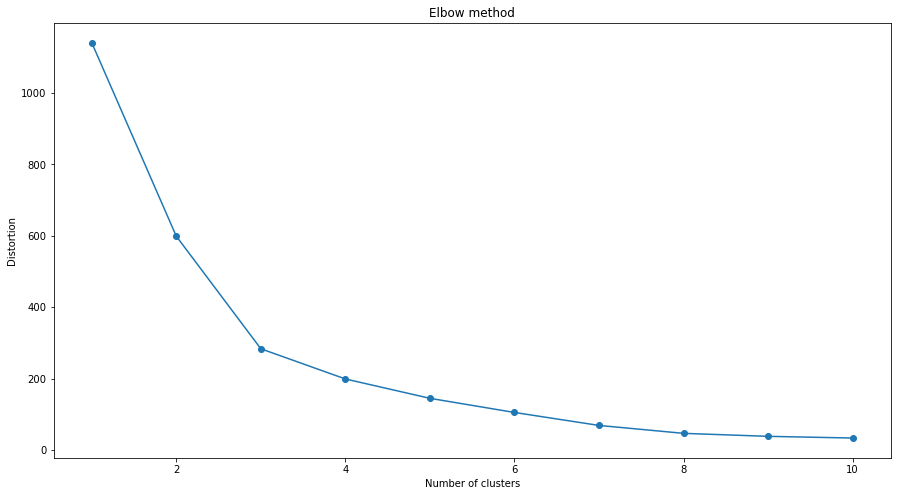

In [114]:
plot_inertia(bank_bhv_seg_scaled)

In [115]:
#Plot PCA
from sklearn.decomposition import PCA


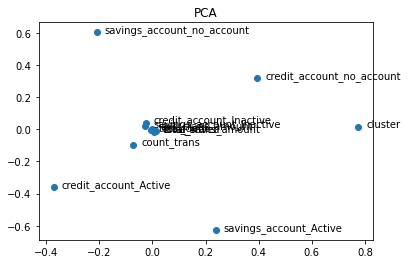

In [116]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bank_bhv_seg_scaled)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(bank_bhv_seg_scaled.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(8,0), textcoords='offset points')

fig.savefig('PCA_components')   

In [121]:
#assign 3 clusters to customers
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(bank_bhv_seg_scaled)
k_labels = kmeans.labels_
new_columns=kmeans.predict(bank_bhv_seg_scaled)
clusters = pd.DataFrame(new_columns)

In [124]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

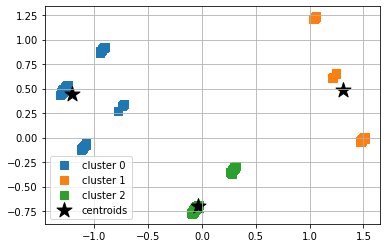

In [125]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

In [126]:
import plotly.graph_objects as go
bank_bhv_seg_scaled['cluster'] = KMeans(n_clusters=3, n_init=10).fit_predict(bank_bhv_seg_scaled)

In [127]:
bank_bhv_seg_scaled['cluster'].value_counts()

1    265
0    203
2    196
Name: cluster, dtype: int64

In [128]:
df_radar= bank_bhv_seg_scaled.groupby('cluster').mean().divide(bank_bhv_seg_scaled.drop('cluster',axis=1).mean())*100
df_radar

,total_saved,total_debt,avg_trans_amount,total_trans_amount,count_trans,savings_account_Active,savings_account_Inactive,savings_account_no_account,credit_account_Active,credit_account_Inactive,credit_account_no_account
cluster,,,,,,,,,,,
0,92.808825,100.726780,103.287773,97.622910,104.403158,0.000000,232.599891,229.233627,138.415493,174.449918,0.00000
1,104.695592,99.775253,98.886563,101.014384,121.056737,177.066667,0.000000,0.000000,144.534547,116.930818,0.00000
2,101.099371,99.551131,98.100219,101.090497,66.970018,99.374150,97.868481,101.354968,0.000000,0.000000,338.77551


In [129]:
def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

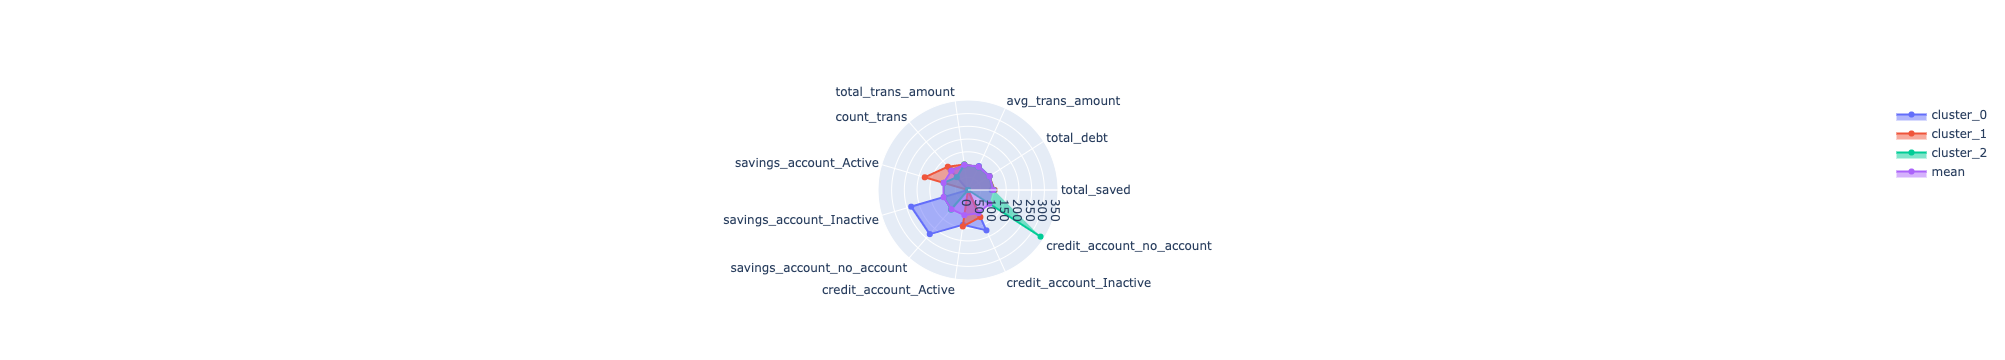

In [130]:
plot_radar_chart(df_radar)